<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/main/Avance3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199



---


### Baseline
#### Background:

El proyecto tiene como objetivo predecir las propiedades de las moléculas presentes en la base de datos ChEMBL (Chemistry for Biology) utilizando un modelo de Machine Learning en este caso probaremos el rendimiento basado en Random Forest y después de generar nuestra base de datos utilizando el script de Paddle. ChEMBL es una extensa base de datos de compuestos bioactivos con información sobre sus propiedades y actividades biológicas.

Random Forest se posiciona como una herramienta poderosa y versátil para comenzar en proyectos de Drug Discovery. Su facilidad de uso, robustez, precisión, capacidad para manejar grandes conjuntos de datos, interpretabilidad de resultados, versatilidad y amplia comunidad lo convierten en una opción atractiva para investigadores que buscan adentrarse en este campo.



---

### Selección de características

¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.

Explicar que las características que tenemos son las necesarias porque son los Fingerprints de la molecula

Los "fingerprints" generados por el script de PaDEL (PAirwise Distance based Enhanced fingerprints and Linear fingerprints) son representaciones de las características moleculares de compuestos químicos. En el contexto del Drug Discovery, los fingerprints se utilizan para describir las propiedades estructurales y químicas de las moléculas, permitiendo su comparación y análisis en estudios de relación estructura-actividad (SAR).

**Fingerprints en Drug Discovery**

Los fingerprints son vectores binarios o numéricos que representan la presencia o ausencia de ciertas subestructuras, características moleculares, o propiedades químicas dentro de una molécula.

*PaDEL-Descriptor:*

PaDEL-Descriptor es una herramienta de software ampliamente utilizada para generar una variedad de fingerprints moleculares y descriptores numéricos. Es compatible con varios formatos de entrada de moléculas y genera descriptores y fingerprints que pueden ser utilizados en análisis quimiométricos y modelos predictivos.

*Tipos de Fingerprints:*

*   Molecular Fingerprints: Representan la presencia de subestructuras específicas dentro de la molécula.
*   MACCS Keys: Un conjunto de 166 bits que representan características moleculares comunes.
* PubChem Fingerprints: Basados en la base de datos PubChem, estos fingerprints contienen 881 bits.
* Extended Connectivity Fingerprints (ECFP): También conocidos como fingerprints circulares, que representan características locales de átomos extendiéndose a sus vecinos a diferentes niveles.
* Path-based Fingerprints: Capturan la presencia de caminos de átomos y enlaces de diferentes longitudes en la molécula.


*Generación de Fingerprints con PaDEL:*

El script de PaDEL toma como entrada archivos que describen moléculas  y genera fingerprints para cada molécula. Los fingerprints resultantes son útiles para realizar tareas como clustering, clasificación, regresión, y análisis de similitud. En este caso utilizaremos el script para generar PubChem Fingerprints y poder utilizarlos para el modelo de bosque aleatorio.

Los fingerprints moleculares pueden beneficiar significativamente a un modelo de Random Forest (bosque aleatorio) en el contexto de Drug Discovery de las siguientes maneras específicas:

* Vectorización de Características: Los fingerprints convierten las propiedades moleculares en vectores binarios o numéricos, lo cual es ideal para el input de modelos de machine learning como Random Forest.
* Captura de Información Compleja: Al encapsular subestructuras moleculares y características químicas en un formato estándar, los fingerprints permiten que el Random Forest trabaje con una representación simplificada pero rica de las moléculas.
* Importancia de Características: Random Forest puede evaluar la importancia de cada característica del fingerprint, identificando qué subestructuras moleculares son más relevantes para las predicciones. Esto es valioso en Drug Discovery para comprender qué características influyen más en la actividad biológica.
* Reducción del Overfitting: Los modelos de Random Forest, al promediar múltiples árboles, son menos propensos a sobreajustarse a los datos de entrenamiento, especialmente cuando trabajan con datos de alta dimensionalidad como los fingerprints.
* Relaciones No Lineales: Random Forest es efectivo para capturar relaciones no lineales entre los fingerprints y la actividad biológica, lo cual es crucial dado que las relaciones moleculares pueden ser complejas y no lineales.
* Escalabilidad: Random Forest maneja bien conjuntos de datos grandes y complejos, comunes en Drug Discovery, donde cada compuesto se describe con numerosos descriptores.

Para evaluar y optimizar la eficiencia de un modelo de Random Forest utilizando fingerprints, es importante ajustar y considerar varios parámetros del modelo.


*    Número de Árboles (n_estimators):

Descripción: Este parámetro define el número de árboles en el bosque.

Efecto: Incrementar el número de árboles generalmente mejora la precisión del modelo hasta cierto punto, pero también aumenta el tiempo de computación.

Consideración: Buscar un equilibrio entre la precisión y el tiempo de entrenamiento. Valores típicos comienzan desde 100 hasta 1000 árboles.
*   Número Máximo de Características (max_features):

Descripción: Define el número de características a considerar al buscar la mejor división.

Efecto: Un valor más alto puede mejorar la precisión del modelo, pero también puede aumentar la posibilidad de overfitting.

Consideración: Se puede probar varios valores, como sqrt(n_features) o log2(n_features), donde n_features es el número total de características.
* Profundidad Máxima de los Árboles (max_depth):

Descripción: Limita la profundidad máxima de los árboles.

Efecto: Limitar la profundidad puede evitar el overfitting, especialmente en conjuntos de datos de alta dimensionalidad como los fingerprints.

Consideración: Valores típicos para empezar pueden ser entre 10 y 50, dependiendo de la complejidad de los datos.
* Mínimo de Muestras para Dividir un Nodo (min_samples_split):

Descripción: El número mínimo de muestras necesarias para dividir un nodo.

Efecto: Valores más altos pueden llevar a árboles más generales y prevenir overfitting.

Consideración: Comúnmente se prueban valores desde 2 hasta 10.
* Mínimo de Muestras en una Hoja (min_samples_leaf):

Descripción: El número mínimo de muestras que un nodo hoja debe tener.

Efecto: Valores más altos pueden llevar a árboles más generales.

Consideración: Valores típicos van desde 1 hasta 10.
* Peso de las Clases (class_weight):

Descripción: Ajusta el peso de las clases en el caso de datos desbalanceados.

Efecto: Ayuda a mejorar la precisión en la predicción de la clase minoritaria.

Consideración: Puede configurarse a balanced para ajustar automáticamente los pesos según la frecuencia de las clases.
* Criterio de División (criterion):

Descripción: La función para medir la calidad de una división.

Efecto: Los criterios comunes son "gini" e "entropy" para clasificación, y "mse" para regresión.

Consideración: Experimenta con ambos para ver cuál funciona mejor en tu caso.
* Bootstrap

Descripción: Indica si se utiliza el muestreo con reemplazo al construir árboles.

Efecto: Utilizar bootstrap=True puede mejorar la robustez del modelo.

Consideración: Normalmente se deja en True, pero puede ser probado con False para ver el impacto.


**Evaluación del Modelo**

Para evalúar la eficiencia del modelo se puede utilizar métricas de rendimiento como:

Accuracy: roporción de predicciones correctas sobre el total de predicciones realizadas.

* Interpretación: Una alta exactitud indica que el modelo está haciendo un buen trabajo clasificando correctamente las instancias, pero puede ser engañosa si las clases están desbalanceadas.

Precision: Proporción de verdaderos positivos sobre el total de positivos predichos.
* Interpretación: Alta precisión significa que cuando el modelo predice una clase positiva, es correcto la mayoría de las veces. Es especialmente útil cuando el costo de un falso positivo es alto.

Recall: Proporción de verdaderos positivos sobre el total de positivos reales.
* Interpretación: Un alto recall indica que el modelo está capturando la mayoría de los positivos reales. Es importante cuando el costo de un falso negativo es alto.

F1-Score: Media armónica de precisión y recall.
* Interpretación: Proporciona un equilibrio entre precisión y recall. Es útil cuando las clases están desbalanceadas y se necesita una única métrica que considere ambos aspectos.

ROC-AUC: Área bajo la curva ROC, que es una gráfica de la tasa de verdaderos positivos frente a la tasa de falsos positivos.
* Interpretación: Un valor de AUC cercano a 1 indica un modelo excelente, mientras que un valor cercano a 0.5 indica un modelo que no es mejor que el azar.

Cross-Validation: : Dividir los datos en múltiples subconjuntos y realizar múltiples rondas de entrenamiento y evaluación.
* Interpretación: Proporciona una mejor estimación del rendimiento del modelo en datos no vistos al reducir la varianza asociada con una única división de datos.









---

### Código para el modelo

In [ ]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar el dataset
ruta_archivo_bioactivity = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50_pubchem_fp.csv'

# Lee el archivo CSV en un DataFrame
df_bioactivity = pd.read_csv(ruta_archivo_bioactivity)

# Mostrar que se haya importado correctamente el archivo
df_bioactivity.head(5)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.102373
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.376751
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.096910
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.207608
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.221849


#### Etiquetas y variable objetivo

The Neuropilin-1 data set contains 881 input features and 1 output variable (pIC50 values).


In [ ]:
# Se define conjunto X para las etiquetas
X = df_bioactivity.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Se define variable Y para el objetivo
Y = df_bioactivity.pIC50
Y

0     4.102373
1     4.376751
2     4.096910
3     4.207608
4     4.221849
5     4.327902
6     4.022276
7     4.657577
8     4.853872
9     4.886057
10    4.886057
11    5.000000
12    5.000000
13    4.537602
14    4.366532
15    4.721246
16    4.886057
17    4.744727
18    4.522879
19    4.853872
20    4.886057
21    4.853872
22    4.769551
23    4.744727
24    4.283997
25    4.481486
26    4.769551
27    4.920819
28    4.721246
29    3.767004
30    4.036212
31    6.215383
32    6.096910
33    4.600000
Name: pIC50, dtype: float64

#### Dimensión de los conjuntos



In [ ]:
X.shape

(34, 881)

In [ ]:
Y.shape

(34,)

Eliminamos columnas con baja varianza


In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(34, 193)

#### Data split

(80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((27, 193), (27,))

In [ ]:
X_test.shape, Y_test.shape

((7, 193), (7,))

#### Modelo de regresión con Random Forest



In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.09858643158185743

In [ ]:
Y_pred = model.predict(X_test)

#### Scatter Plot of Experimental vs Predicted pIC50 Values

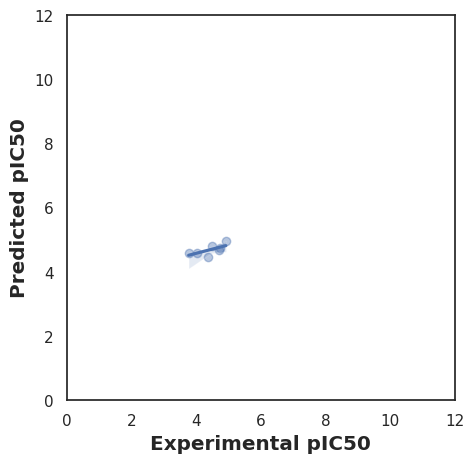

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()



---


### Conclusiones de fase "Baseline"

TODO